In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import find_peaks
m= 2
k = 0.5
b=0.2
F0 = 0
wf = 1
x0= 0.2
v0x= 0


In [101]:
N=100000
tfinal=100
xt= np.empty(N)
xt[0]=x0
vxt= np.empty(N)
vxt[0]=v0x
t = np.empty(N)
t[0] = 0

maximum = []
minimum = []

period_list = []
amp_list = []

dt=tfinal/N

In [102]:
def maxminv(x0,x1,x2,y0,y1,y2):
 # Máximo ou mínimo usando o polinómio de Lagrange
 # Dados (input): (x0,y0), (x1,y1) e (x2,y2)
 # Resultados (output): xm, ymax
 xab=x0-x1
 xac=x0-x2
 xbc=x1-x2
 a=y0/(xab*xac)
 b=-y1/(xab*xbc)
 c=y2/(xac*xbc)
 xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2
 xm=0.5*xmla/(a+b+c)
 xta=xm-x0
 xtb=xm-x1
 xtc=xm-x2
 ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
 return xm, ymax

In [103]:
def eulercromer():
    for i in range(N-1):
        ax=-(k*xt[i] + b * vxt[i] - F0*math.cos(wf*t[i]))/m
        
        vxt[i+1]=vxt[i]+ax*dt
        xt[i+1]=xt[i]+vxt[i+1]*dt
        
        t[i+1]= t[i] + dt

        if (xt[i-1] < xt[i] > xt[i+1]) and i>=60/dt: #para estar no regime estacionario
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xt[i-1], xt[i], xt[i+1]
            xm, xmax = maxminv(t0, t1, t2, y0, y1, y2)
            maximum.append([xm, xmax])
        if (xt[i-1]> xt[i] < xt[i+1]) and i>=60/dt: 
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xt[i-1], xt[i], xt[i+1]
            xm, xmin = maxminv(t0, t1, t2, y0, y1, y2)
            minimum.append([xm, xmin])
        
    return
eulercromer()

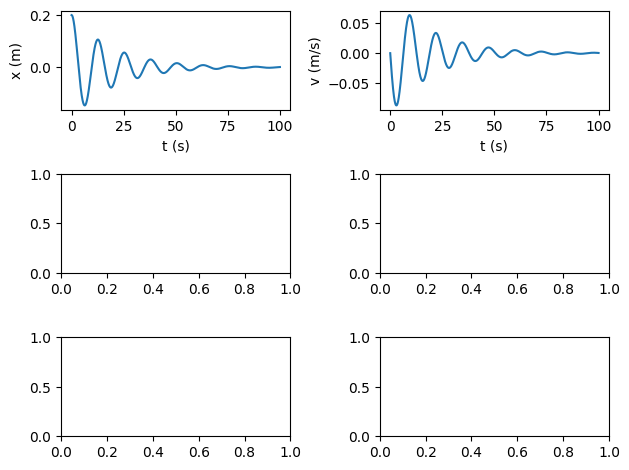

In [104]:
figure, axis = plt.subplots(3,2)
axis[0,0].plot(t, xt, linestyle="-")
axis[0,0].set_xlabel("t (s)")
axis[0,0].set_ylabel("x (m)")
axis[0,1].plot(t, vxt, linestyle="-")
axis[0,1].set_xlabel("t (s)")
axis[0,1].set_ylabel("v (m/s)")
figure.tight_layout()

In [105]:
F0 = 5
wf = 1

In [106]:
N=100000
tfinal=100
xt= np.empty(N)
xt[0]=x0
vxt= np.empty(N)
vxt[0]=v0x
t = np.empty(N)
t[0] = 0

maximum = []
minimum = []

period_list = []
amp_list = []

dt=tfinal/N

In [107]:
eulercromer()

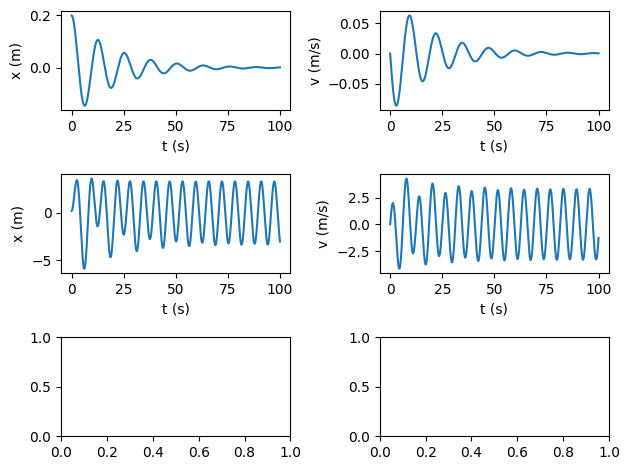

In [108]:
axis[1,0].plot(t, xt, linestyle="-")
axis[1,0].set_xlabel("t (s)")
axis[1,0].set_ylabel("x (m)")
axis[1,1].plot(t, vxt, linestyle="-")
axis[1,1].set_xlabel("t (s)")
axis[1,1].set_ylabel("v (m/s)")
figure.tight_layout()
figure

In [109]:
def calculate_period():
    for i in range(1, len(maximum)):
        period_list.append(maximum[i][0]-maximum[i-1][0])
    estimated_period= (sum(period_list)/len(period_list))
    return estimated_period
def calculate_amplitude():
    avg_max = sum(x[1] for x in maximum) / len(maximum)
    avg_min = sum(x[1] for x in minimum) / len(minimum)
    return abs(avg_max - avg_min) / 2

T = calculate_period()
Amp = calculate_amplitude()
print("Amplitude = " + str(Amp) + " m; Período = " + str(T) + " s;")

Amplitude = 3.2984828807837543 m; Período = 6.287963924300601 s;


In [110]:
F0 = 5
wf = 0.5

In [111]:
N=100000
tfinal=100
xt= np.empty(N)
xt[0]=x0
vxt= np.empty(N)
vxt[0]=v0x
t = np.empty(N)
t[0] = 0

maximum = []
minimum = []

period_list = []
amp_list = []

dt=tfinal/N

In [112]:
eulercromer()

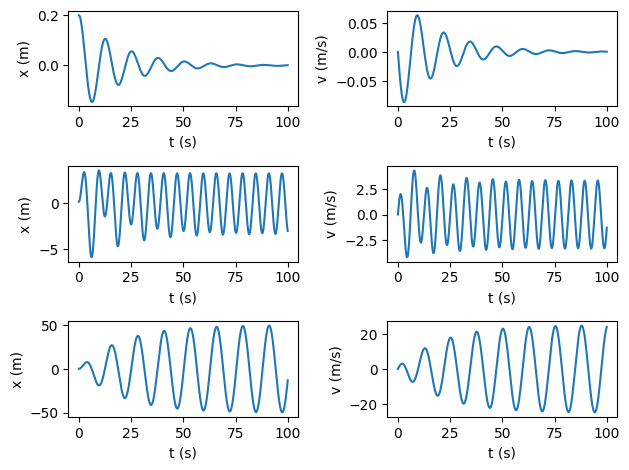

In [113]:
axis[2,0].plot(t, xt, linestyle="-")
axis[2,0].set_xlabel("t (s)")
axis[2,0].set_ylabel("x (m)")
axis[2,1].plot(t, vxt, linestyle="-")
axis[2,1].set_xlabel("t (s)")
axis[2,1].set_ylabel("v (m/s)")
figure.tight_layout()
figure

In [114]:
T = calculate_period()
Amp = calculate_amplitude()
print("Amplitude = " + str(Amp) + " m; Período = " + str(T) + " s;")

Amplitude = 49.0461108686938 m; Período = 12.567607640972831 s;


In [115]:
#A amplitude quando wf = 0.5 é muito maior pois esta frequência é muito próxima da frequência natural do sistema o que provoca ressonância.
#Esta amplitude natural é dada por math.sqrt(k/m), que é exatamente 0.5

0.5
